<a href="https://colab.research.google.com/github/StinaFia/cv/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Natural Language Processing (NLP) in Cloud Environment</h2>


In [18]:
import pandas as pd
import pickle

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_csv('/content/drive/My Drive/CloudComputing/McDonald_s_Reviews.csv', encoding='ISO-8859-1')
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


# Checking for Missing Values and removing them

Check the DataFrame for any missing values in each column.

In [21]:
df.isnull().sum()

,0
reviewer_id,0
store_name,0
category,0
store_address,0
latitude,660
longitude,660
rating_count,0
review_time,0
review,0
rating,0


Drop rows with any null values

In [22]:
df.dropna(inplace=True)
df.isnull().sum()

,0
reviewer_id,0
store_name,0
category,0
store_address,0
latitude,0
longitude,0
rating_count,0
review_time,0
review,0
rating,0


Column min and max-values

In [23]:
df.describe()

,reviewer_id,latitude,longitude
count,32736.000000,32736.000000,32736.000000
mean,16580.605022,34.442546,-90.647033
std,9700.796513,5.344116,16.594844
min,1.000000,25.790295,-121.995421
25%,8184.750000,28.655350,-97.792874
50%,16368.500000,33.931261,-81.471414
75%,25202.250000,40.727401,-75.399919
max,33396.000000,44.981410,-73.459820


Rating column is string value -> `str.extract(r'(\d+)')` to extract the numerical part of the string and change type to integer

In [24]:
df['rating'] = df['rating'].str.extract(r'(\d+)').astype(int)

In [25]:
df['sentiment'] = df['rating'].apply(lambda x: 'negative' if x <= 2 else 'positive' if x == 5 else 'neutral')
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,neutral
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,negative


# Preparing the Data for Training

Code splits the dataset into two parts: one for training the model and one for testing its performance. X contains the review texts, and y contains the sentiment labels (positive, negative). The data is split so that 70% is used for training and 30% for testing. The random_state parameter ensures that the split is reproducible, meaning it will present the same split every time the code is run.

In [26]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
y_test

,sentiment
26147,negative
11570,neutral
31405,negative
1118,positive
369,positive
...,...
5834,neutral
28700,negative
20444,negative
31112,positive


In [28]:
y_train

,sentiment
20578,positive
85,neutral
11203,negative
14420,positive
29035,positive
...,...
30462,negative
5390,negative
860,positive
15795,negative


# Creating and Training the Model

This block of code creates a machine learning pipeline consisting of two steps: vectorization and classification.

 * TF-IDF Vectorizer: Converts the raw review texts into a numerical format (specifically, TF-IDF vectors) that the machine learning model can work with. TF-IDF stands for Term Frequency-Inverse Document Frequency, a way to quantify the importance of words in a document based on how frequently they appear in that document and how unique they are across all documents.
 * LinearSVC: A type of Support Vector Machine (SVM) used for classification. It tries to find the best boundary that separates data points of different classes.

The pipeline first transforms the texts into TF-IDF vectors and then fits (trains) a LinearSVC model on the training data.

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

text_clf.fit(X_train, y_train)

# Save model as a .pkl file
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(text_clf, f)

In [30]:
from google.colab import files
files.download("sentiment_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluating the Model

After training, the model makes predictions on the test data. The classification_report function then generates a report that shows the main classification metrics, such as precision, recall, and f1-score, for each class. These metrics help in evaluating the performance of the model.

In [31]:
predictions = text_clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      3742
     neutral       0.69      0.62      0.65      3056
    positive       0.76      0.75      0.75      3023

    accuracy                           0.76      9821
   macro avg       0.75      0.75      0.75      9821
weighted avg       0.76      0.76      0.76      9821



# Visualizing the Confusion Matrix

A confusion matrix is a visualization that helps understand how well the model is predicting each class. It shows the number of correct and incorrect predictions made by the model and categorized by the actual classes.

In [32]:
cm = confusion_matrix(y_test, predictions)
cm

array([[3321,  327,   94],
       [ 523, 1902,  631],
       [ 212,  546, 2265]])

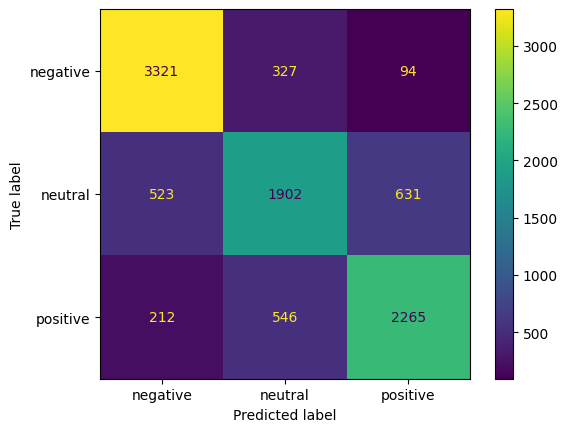

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=text_clf.classes_)
disp.plot()

# Making Predictions with the Model

Demonstrate how to use the trained model to make predictions on new unseen data.


In [34]:
text_clf.predict(['the food was cold'])

array(['negative'], dtype=object)

In [35]:
text_clf.predict(['fast service'])

array(['positive'], dtype=object)